# Similarity Maps Examples

- [REFERENCE 1](https://greglandrum.github.io/rdkit-blog/posts/2020-01-03-similarity-maps-with-new-drawing-code.html)
- [REFERENCE 2](https://iwatobipen.wordpress.com/2020/01/04/model-interporation-with-new-drawing-code-of-rdkit-rdkit-machine-learning-chemoinformatics/)

In [1]:
from functools import partial
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from IPython.display import SVG
import io
from PIL import Image
import numpy as np
import rdkit
print(rdkit.__version__)

2024.09.3


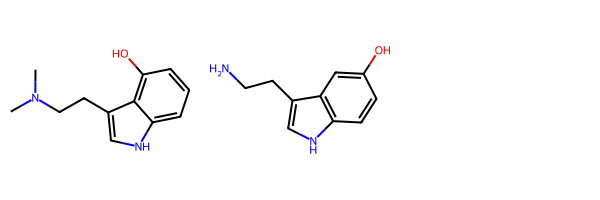

In [2]:
psilocin = Chem.MolFromSmiles("CN(C)CCc1c[nH]c2cccc(O)c12")
serotonin = Chem.MolFromSmiles("C1=CC2=C(C=C1O)C(=CN2)CCN")
Draw.MolsToGridImage((psilocin,serotonin))

**FUTURE WORK** try GetSimilarityMapForModel() method

In [3]:
def show_png(data):
    bio = io.BytesIO(data)
    img = Image.open(bio)
    return img

Colors:
- Green = No overall changes
- Red = Positive class, has a positive influence on the property (property value increases)
- Blue = Negative class, property value decreases
- Orange = Zero

Issues correspond to bits. Removal or add bits will decrease or increase similarity respectively. Tie this information with bit visualization?

[REFERENCE](https://jcheminf.biomedcentral.com/articles/10.1186/1758-2946-5-43)

[12:22:17] DEPRECATION WARNING: please use MorganGenerator
[12:22:17] DEPRECATION WARNING: please use MorganGenerator


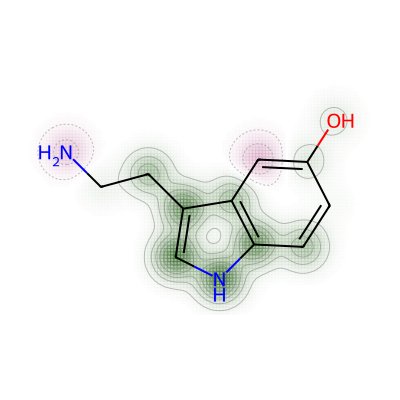

In [4]:
d = Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(psilocin, serotonin,
                                                             lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv', nBits=2048),
                                                             draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

[12:22:17] DEPRECATION WARNING: please use MorganGenerator
[12:22:17] DEPRECATION WARNING: please use MorganGenerator


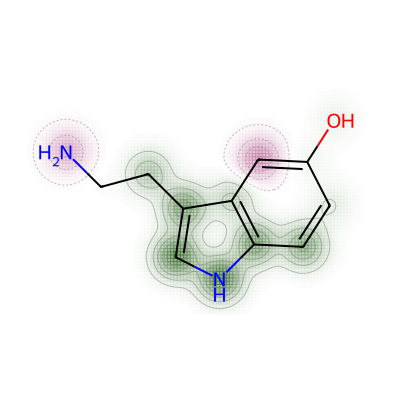

In [5]:
d = Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(psilocin, serotonin,
                                                             lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='count', nBits=2048),
                                                             draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

In [6]:
fpfunc = partial(SimilarityMaps.GetMorganFingerprint, nBits=1024, radius=2)

In [7]:
fpfunc(psilocin)

[12:22:17] DEPRECATION WARNING: please use MorganGenerator


In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem
from pharmacophore import Draw

mol1 = '../dataset/F059-1017_docked.sdf'
mol2 = '../dataset/E966-0578_docked.sdf'
hit = '../dataset/CDK8_ML_Hit.sdf'

supplier = Chem.SDMolSupplier(mol1) # this is an iterator
mol_1 = supplier[0]

supplier = Chem.SDMolSupplier(mol2) # this is an iterator
mol_2 = supplier[0]

mols = [mol_1, mol_2]

In [9]:
AllChem.Compute2DCoords(mol_1)
AllChem.Compute2DCoords(mol_2)

0

[12:22:18] DEPRECATION WARNING: please use MorganGenerator
[12:22:18] DEPRECATION WARNING: please use MorganGenerator


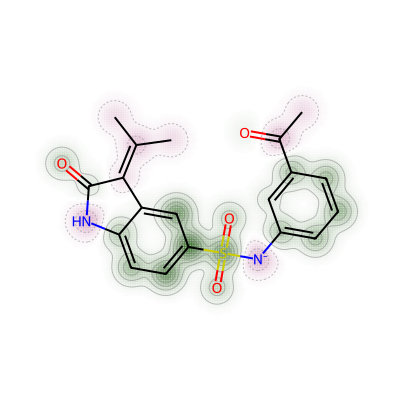

In [10]:
draw = Draw()
img = draw.similarity_maps(mol_1, mol_2)
img.save('F059.png')
img

[12:22:18] DEPRECATION WARNING: please use MorganGenerator
[12:22:18] DEPRECATION WARNING: please use MorganGenerator


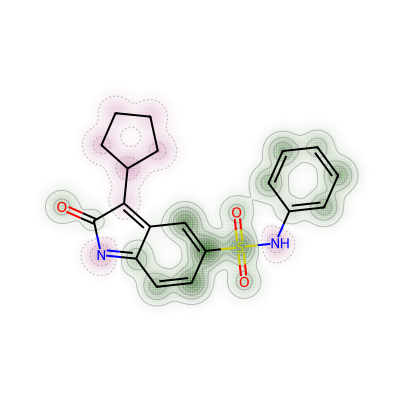

In [11]:
img = draw.similarity_maps(mol_2, mol_1)
img.save('E966.png')
img